## Machine Learning

Get a model to learn trends from  data on any topic and be able to reproduce those trends on comparable data in the future.

### Supervised Learning

- Train a model to learn trends from *labeled* data and be able to reproduce those trends and assign labels on comparable unseen data.
- Have clear distinction between independent and target/dependent variables. Use independent variables to predict target variable.
- Unseen data has known (but some times incomplete) set of independent variables and we use our model to predict target variable.

#### Two Main Types of Suprversied Learning: Classification and Regression

- Classification: Target variable is cateorical. Model categorizes observations into pre-determined (supervised) labels. Example: Given statistics, did the team win, lose, or draw (3 categories).
- Regression: Target variable is numeric. Example: Given statistics, what percentage of possession did a team have?

Question: If our target variable is the score of a soccer match? Should we use classfication or regression models? How do we design a target variable that leads to a robust model?

**Resource for R:** https://m154-comp-stats.netlify.app/notes.html

#### k-nearest neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
irisData = load_iris()
irisData
print(irisData.target_names)
print(irisData.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X = irisData.data
y = irisData.target
print(len(X))
print(len(X[0]))
print(len(y))

150
4
150


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)
print(len(X_train))
print(len(X_test))

120
30


In [5]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(knn.predict([[.1,.1,.1,.1],[.4,.7,.3,.2]]))

[0 0 1 0 0 2 1 2 1 0 2 0 1 2 2 2 1 0 0 0 2 1 2 2 2 2 1 2 0 0]
[0 0]


In [6]:
print(knn.score(X_test, y_test))

1.0


Cross Validating k (number of neighbors)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

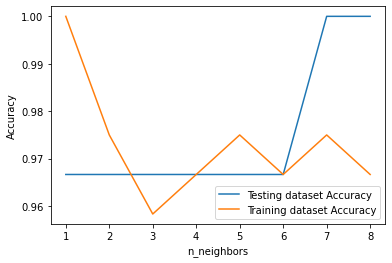

In [8]:
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=47)
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Support Vector Machines (SVM)

https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/

In [9]:
import numpy as np
from sklearn.datasets import make_classification # makes simulated datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

0.84
0.96


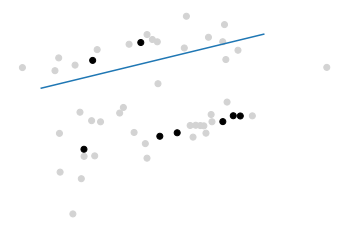

In [10]:
classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)

model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

model.fit(X_train, y_train)

y=model.predict(X_test)
y2=model.predict(X_train)

from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)

import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)
 
# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

#### Random Forests

https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

https://m154-comp-stats.netlify.app/notes.html